In [4]:
from activ import load_data, data_normalization
import os
from activ.readfile import TrackTBIFile
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap, nmf_bases_heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display, Latex, Markdown
from pylatex import Document, Section, Subsection, Command
from pylatex import Document, Section, Figure, SubFigure, NoEscape
from pylatex.utils import italic, NoEscape

In [5]:
raw = load_data()
labels = raw.outcome_features

In [6]:
nmfdata = load_data(uoinmf=True)

In [7]:
rawbm = raw.biomarkers #(247,235)
feature_names = raw.outcome_features
A = data_normalization.data_normalization(raw.outcomes, 'positive') #(247,177)

In [8]:
w = nmfdata.outcomes #(247,6)
h = nmfdata.outcome_bases #(6,177)

In [9]:
def drop_x_percent(A,w,h,feature_names,percent):
    total_features = h.shape[1]
    num_features_to_drop = np.round(total_features*percent//100)
    h_sum = np.sum(h, axis=0)
    h_sum_sorted = np.argsort(h_sum)
    indices_lowest_values = h_sum_sorted[:num_features_to_drop]
    dropped_features = sorted(feature_names[indices_lowest_values])
    h_new = np.delete(h, indices_lowest_values, axis=1)
    A_new = np.delete(A, indices_lowest_values, axis=1)    
    return A_new, h_new, dropped_features

60
70
80
90


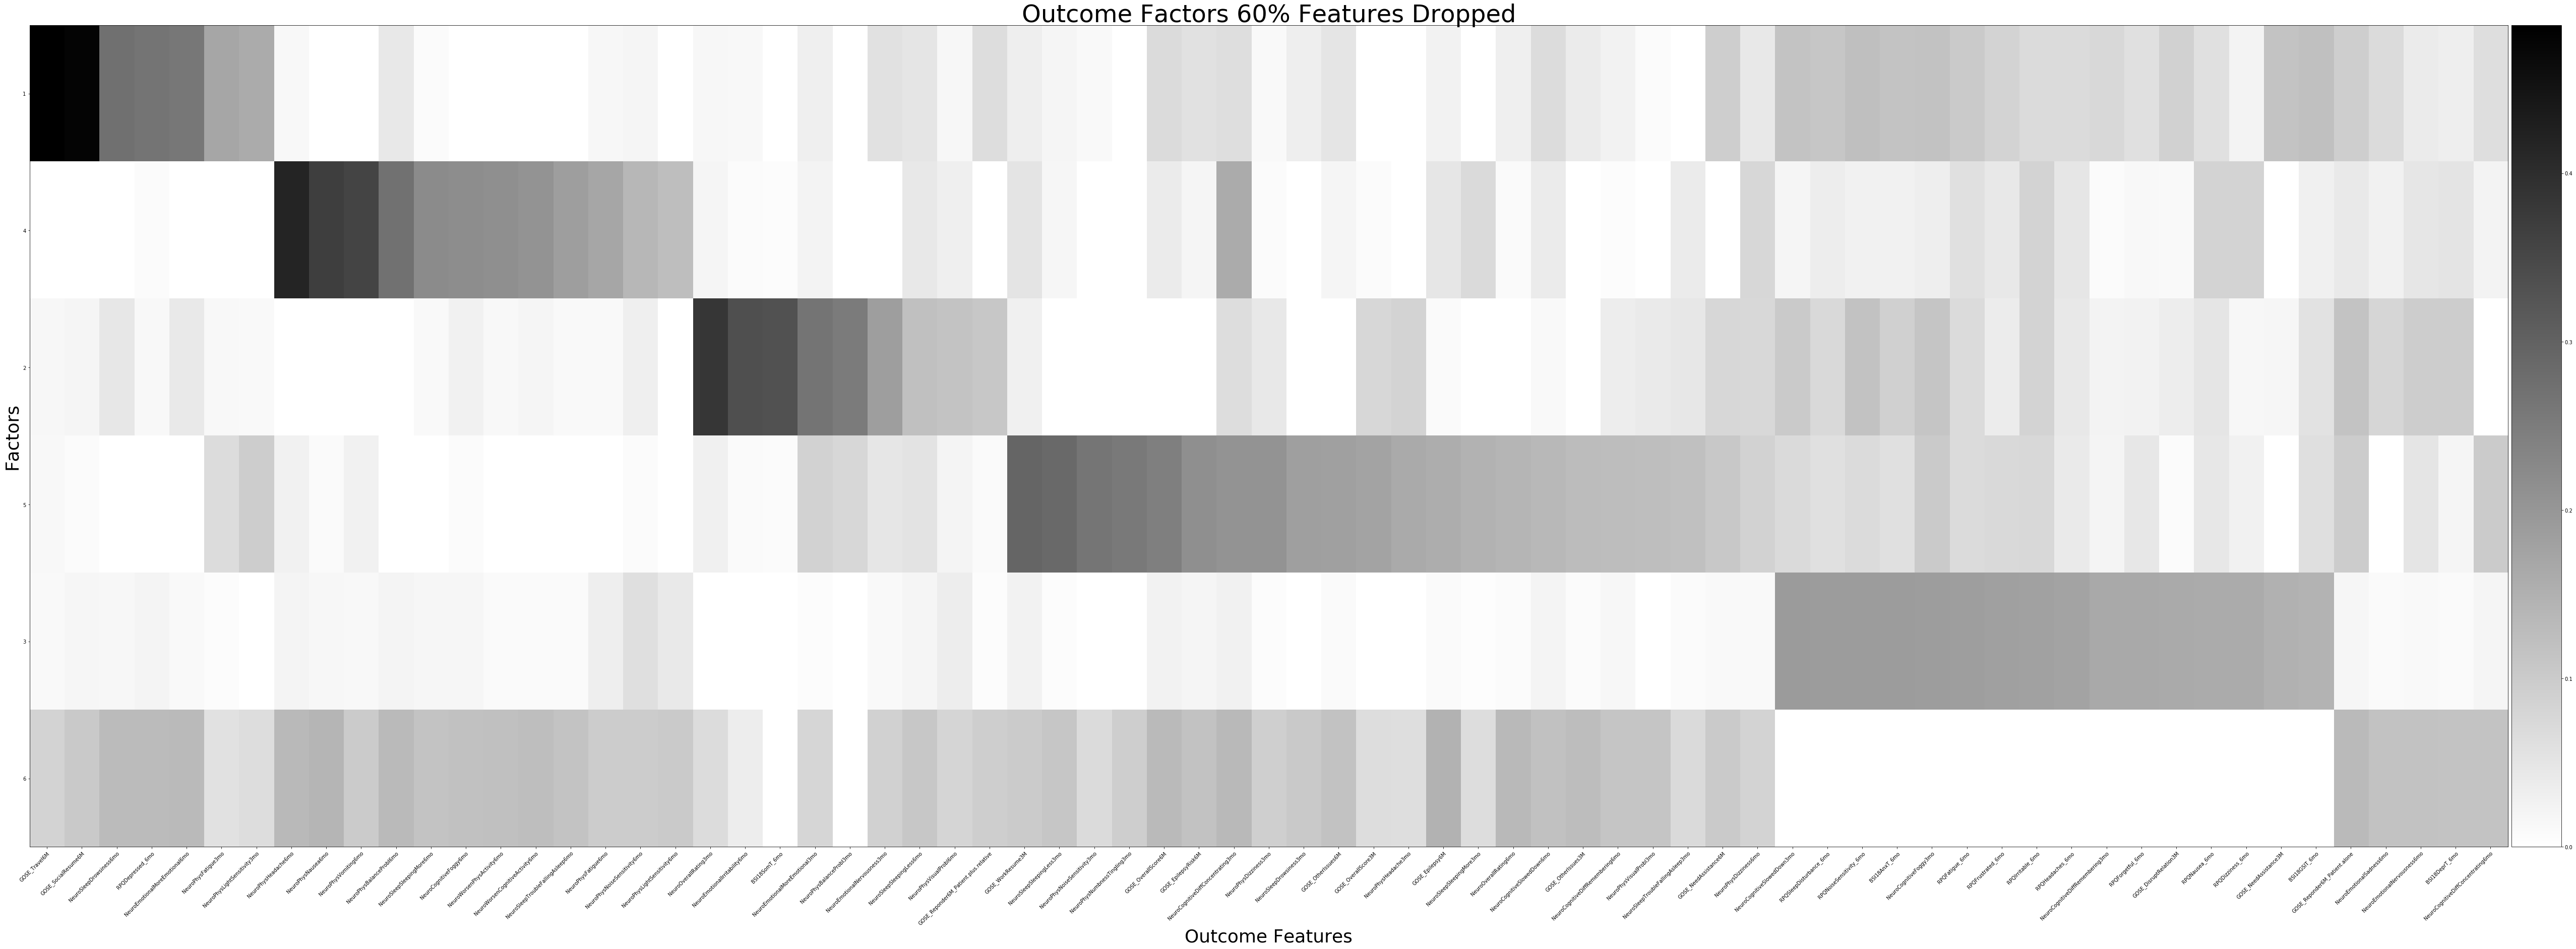

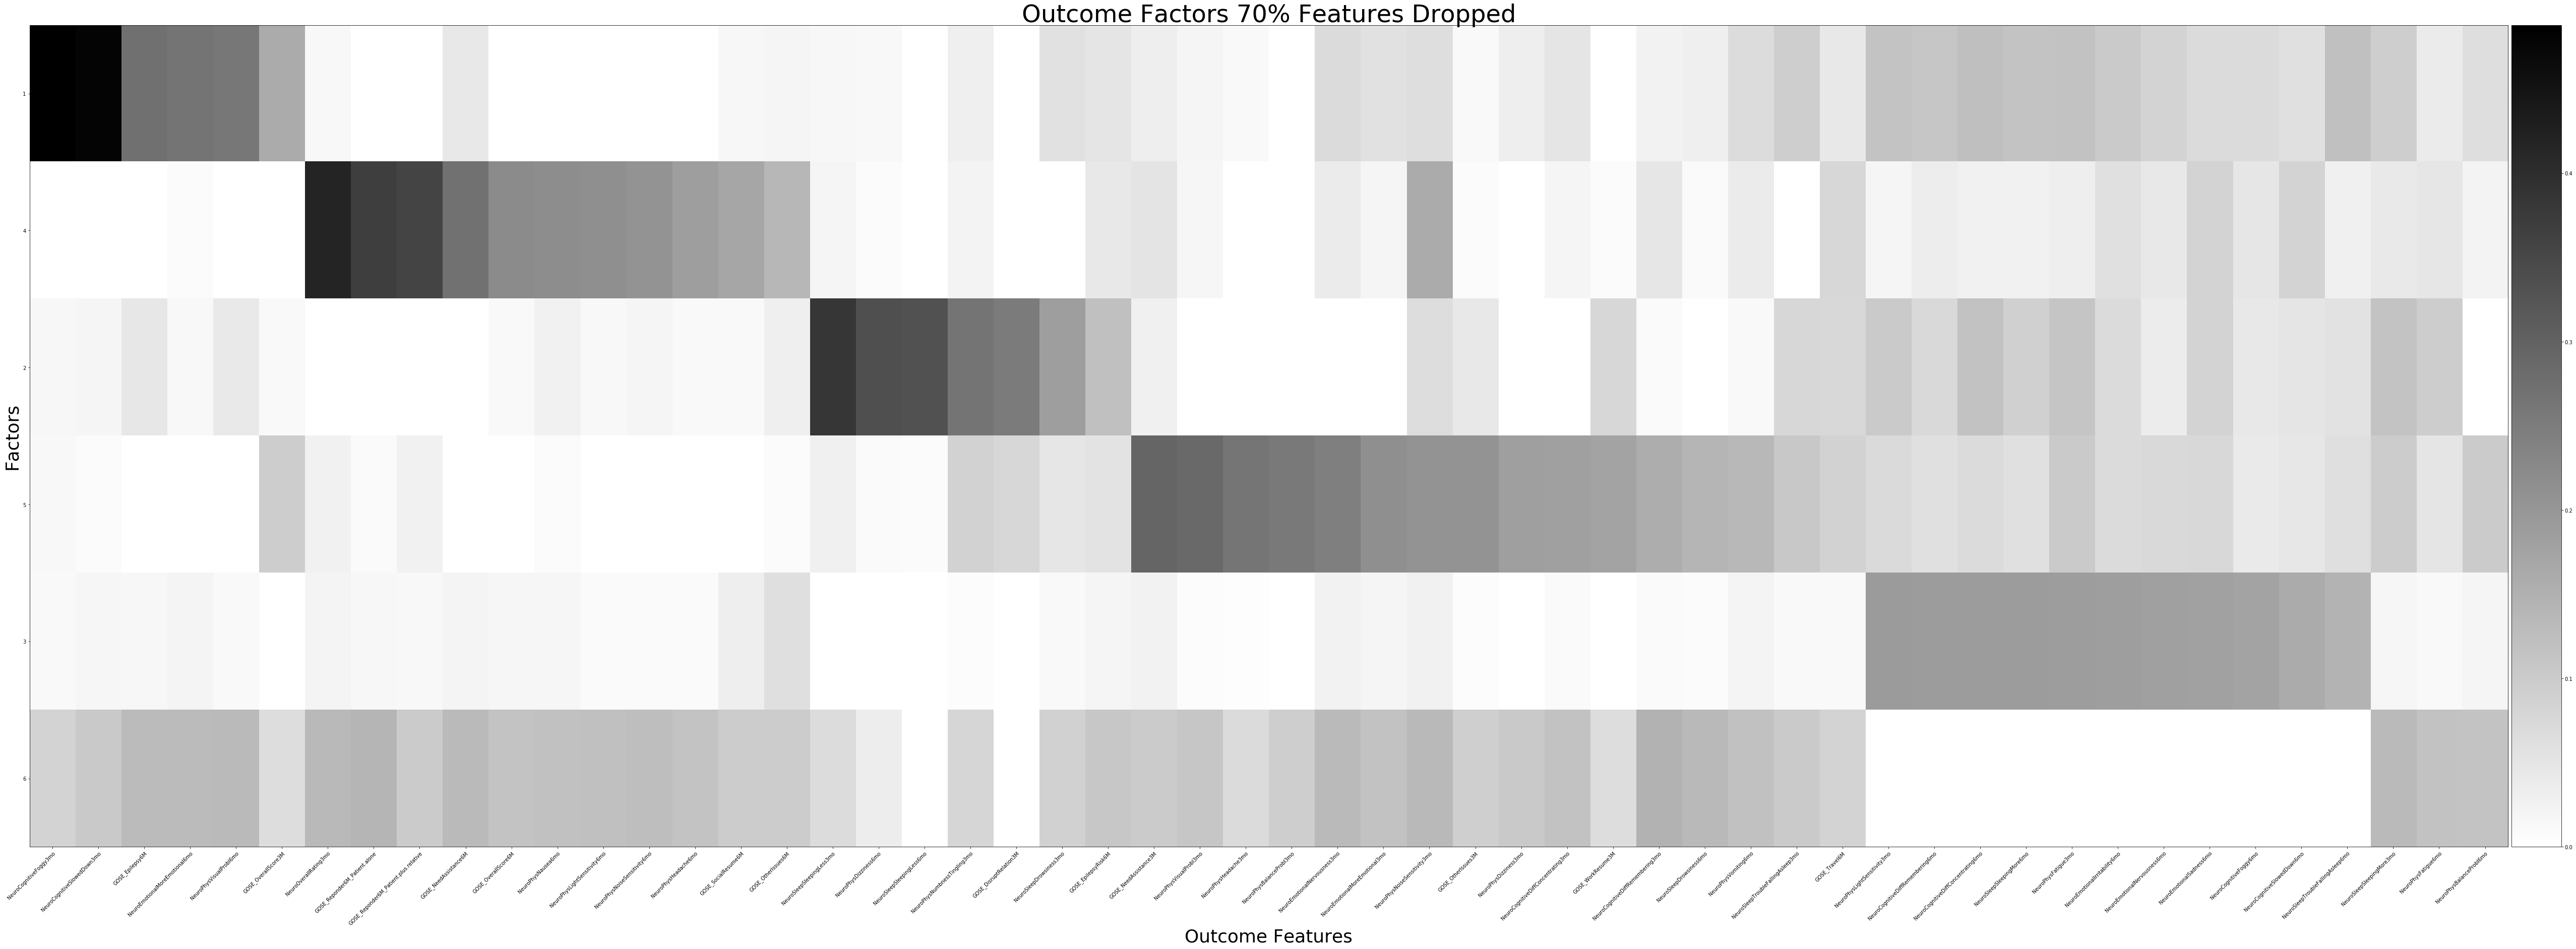

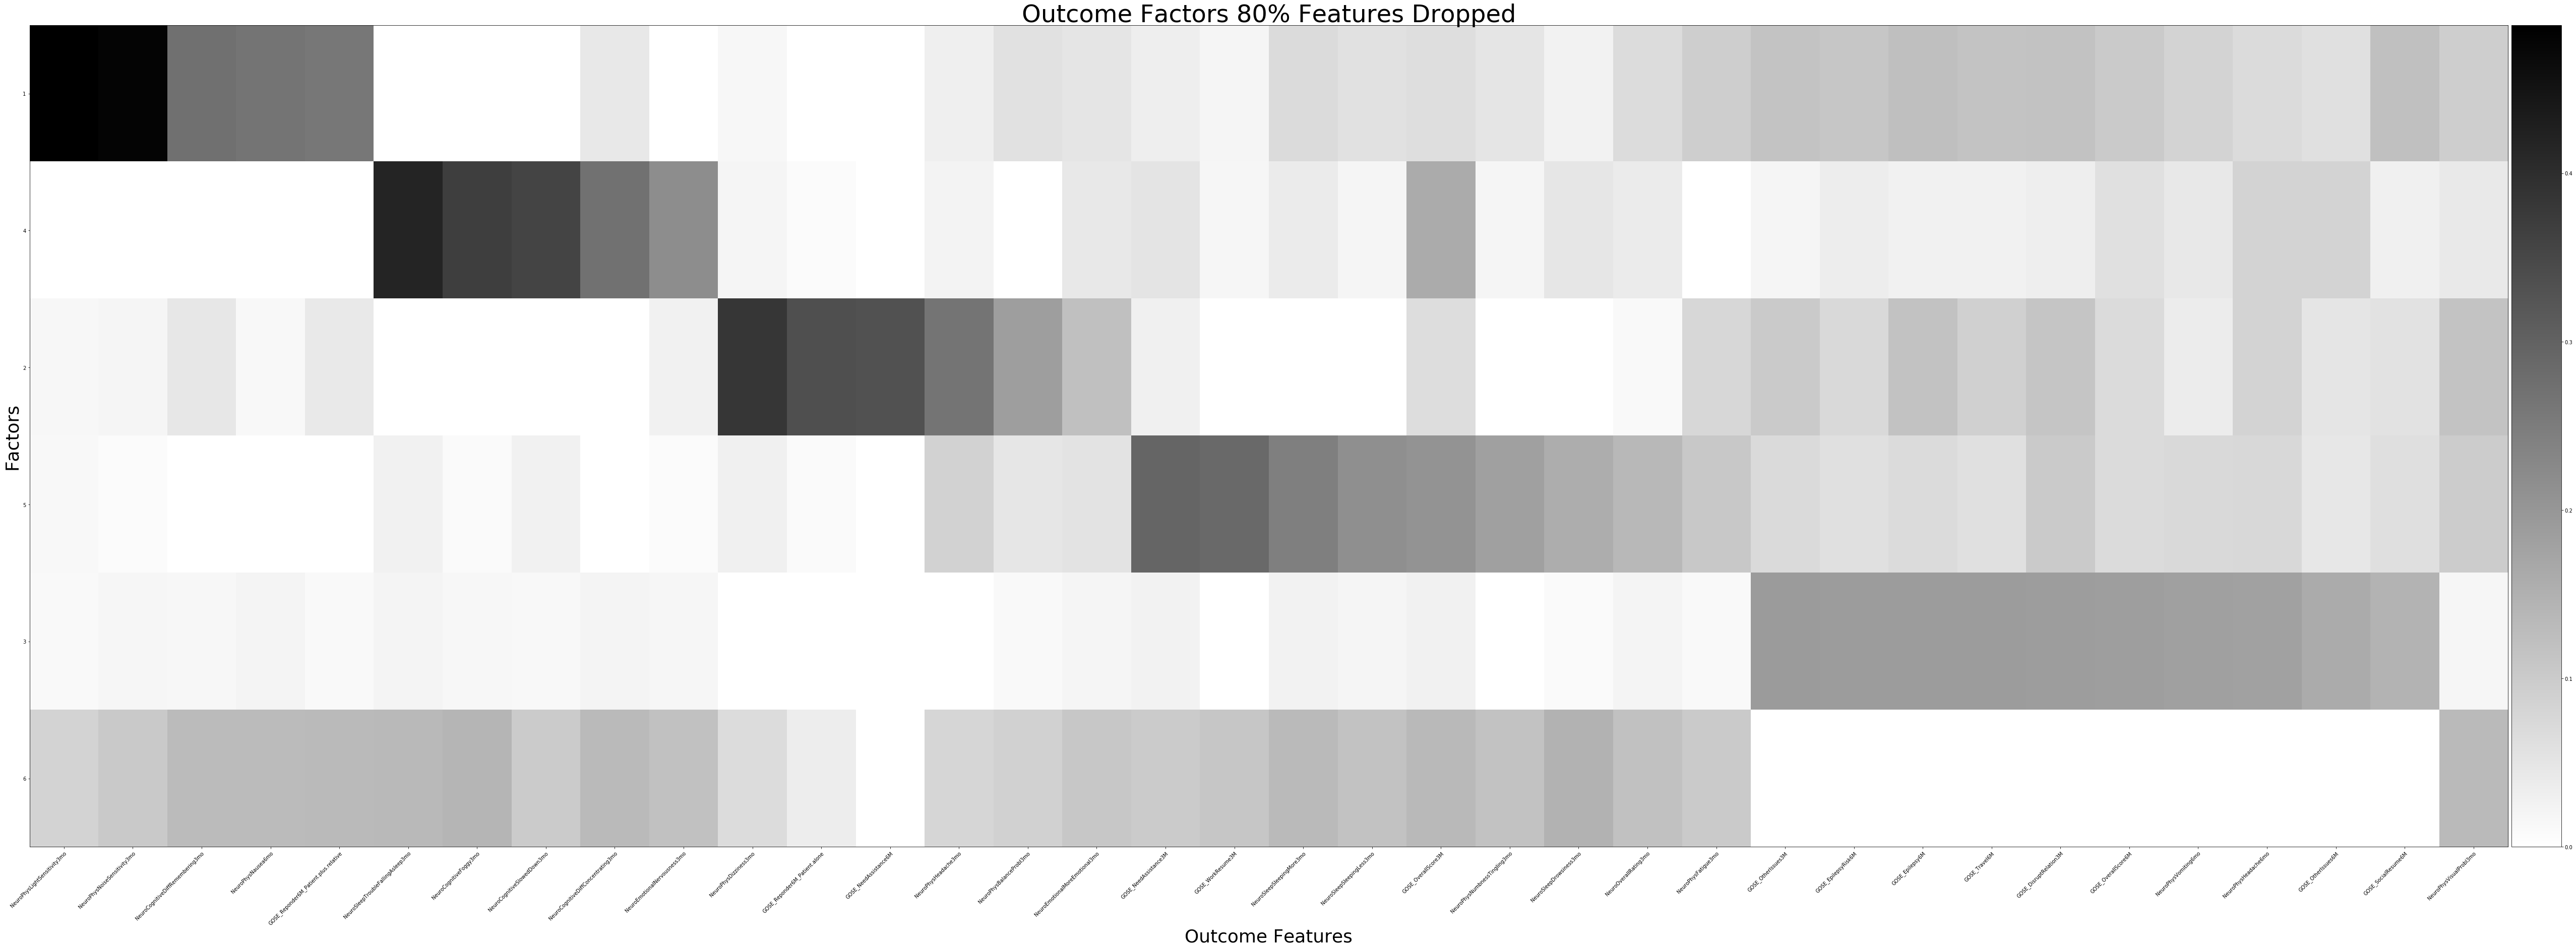

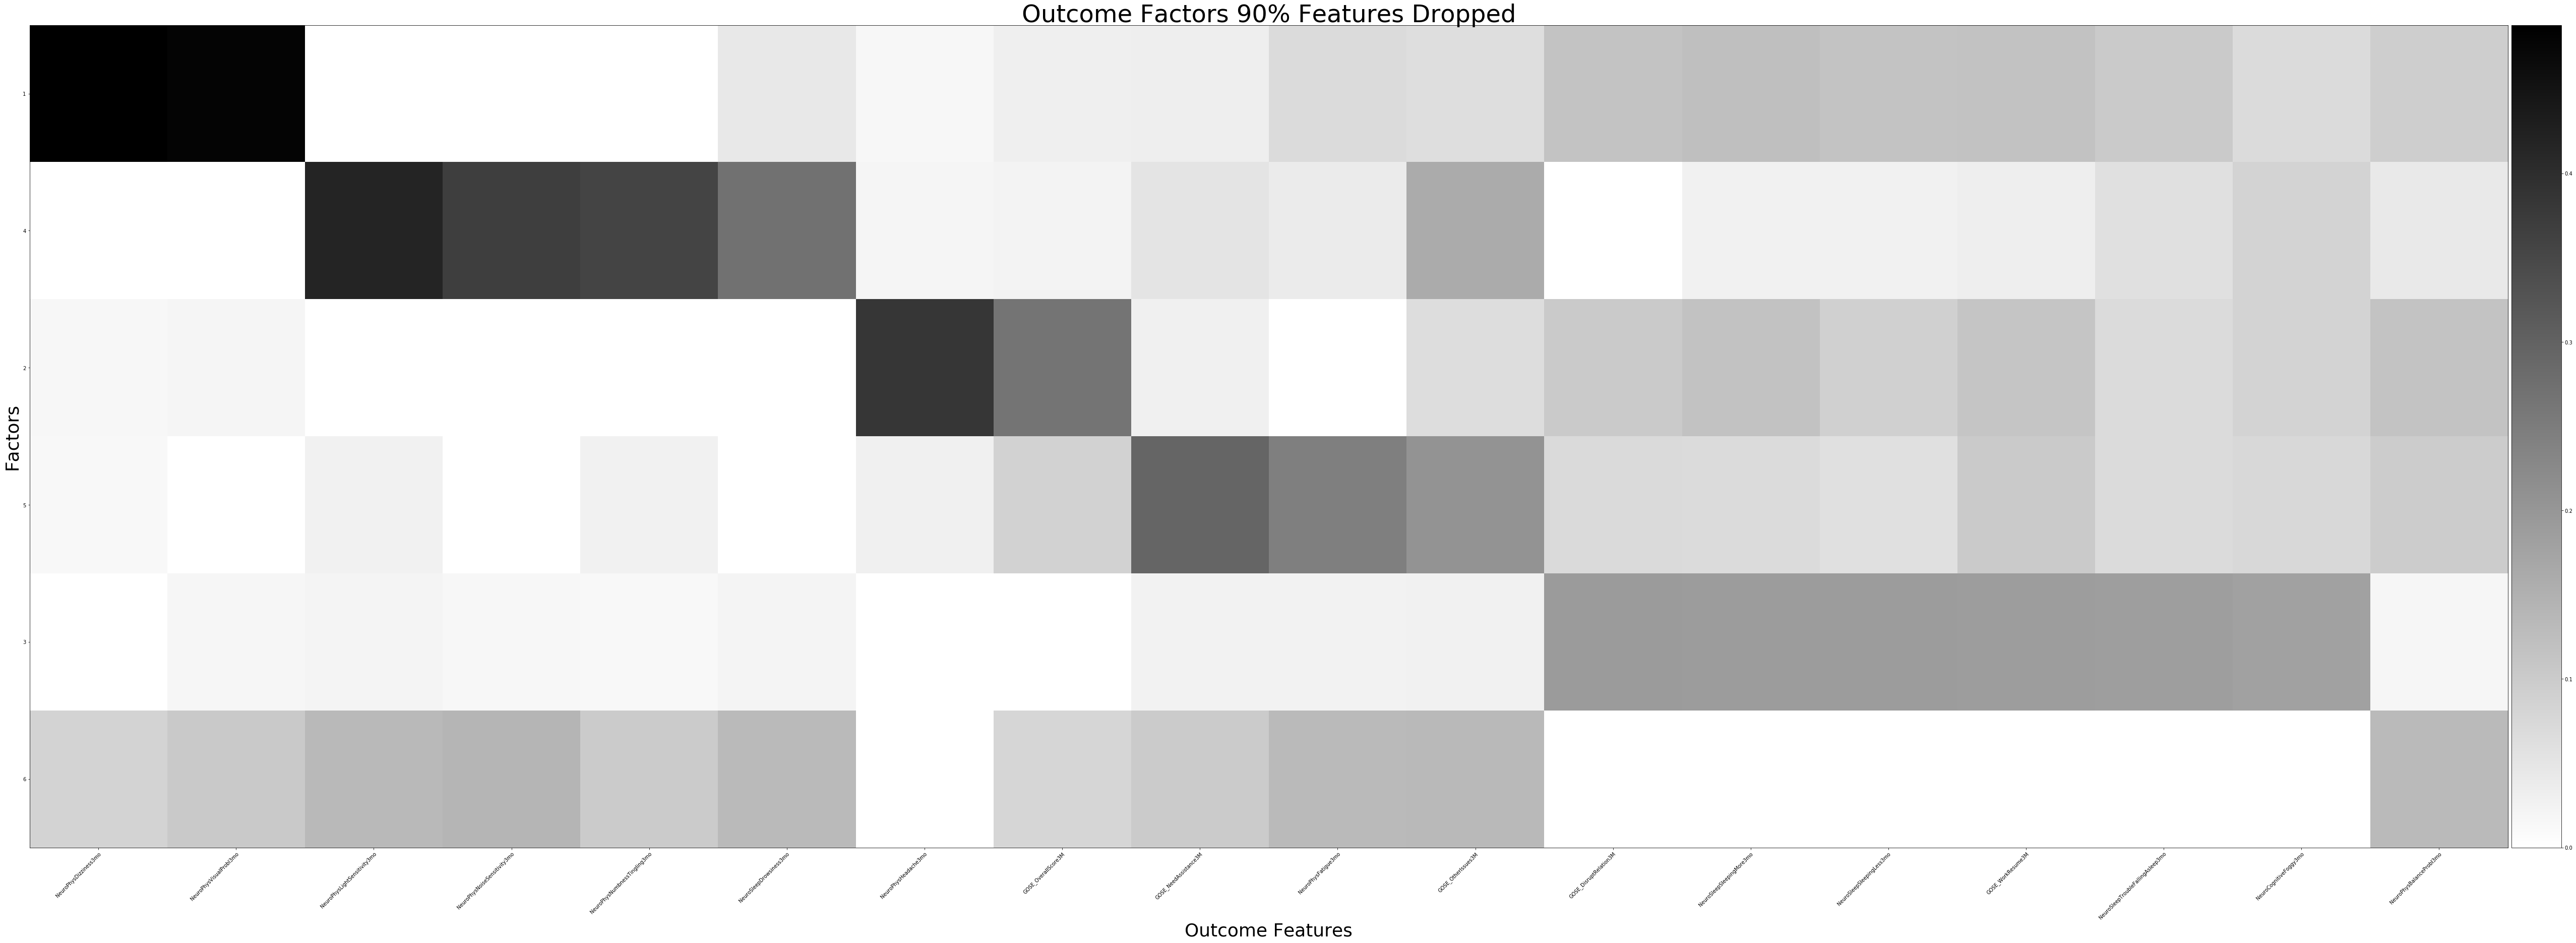

In [8]:
percent = [0,10,20,30,40,50,60,70,80,90]
for p in percent[6:]:
    print(p)
    A_features_dropped, h_new, dropped_features = drop_x_percent(A,w,h,feature_names,p)
    
    

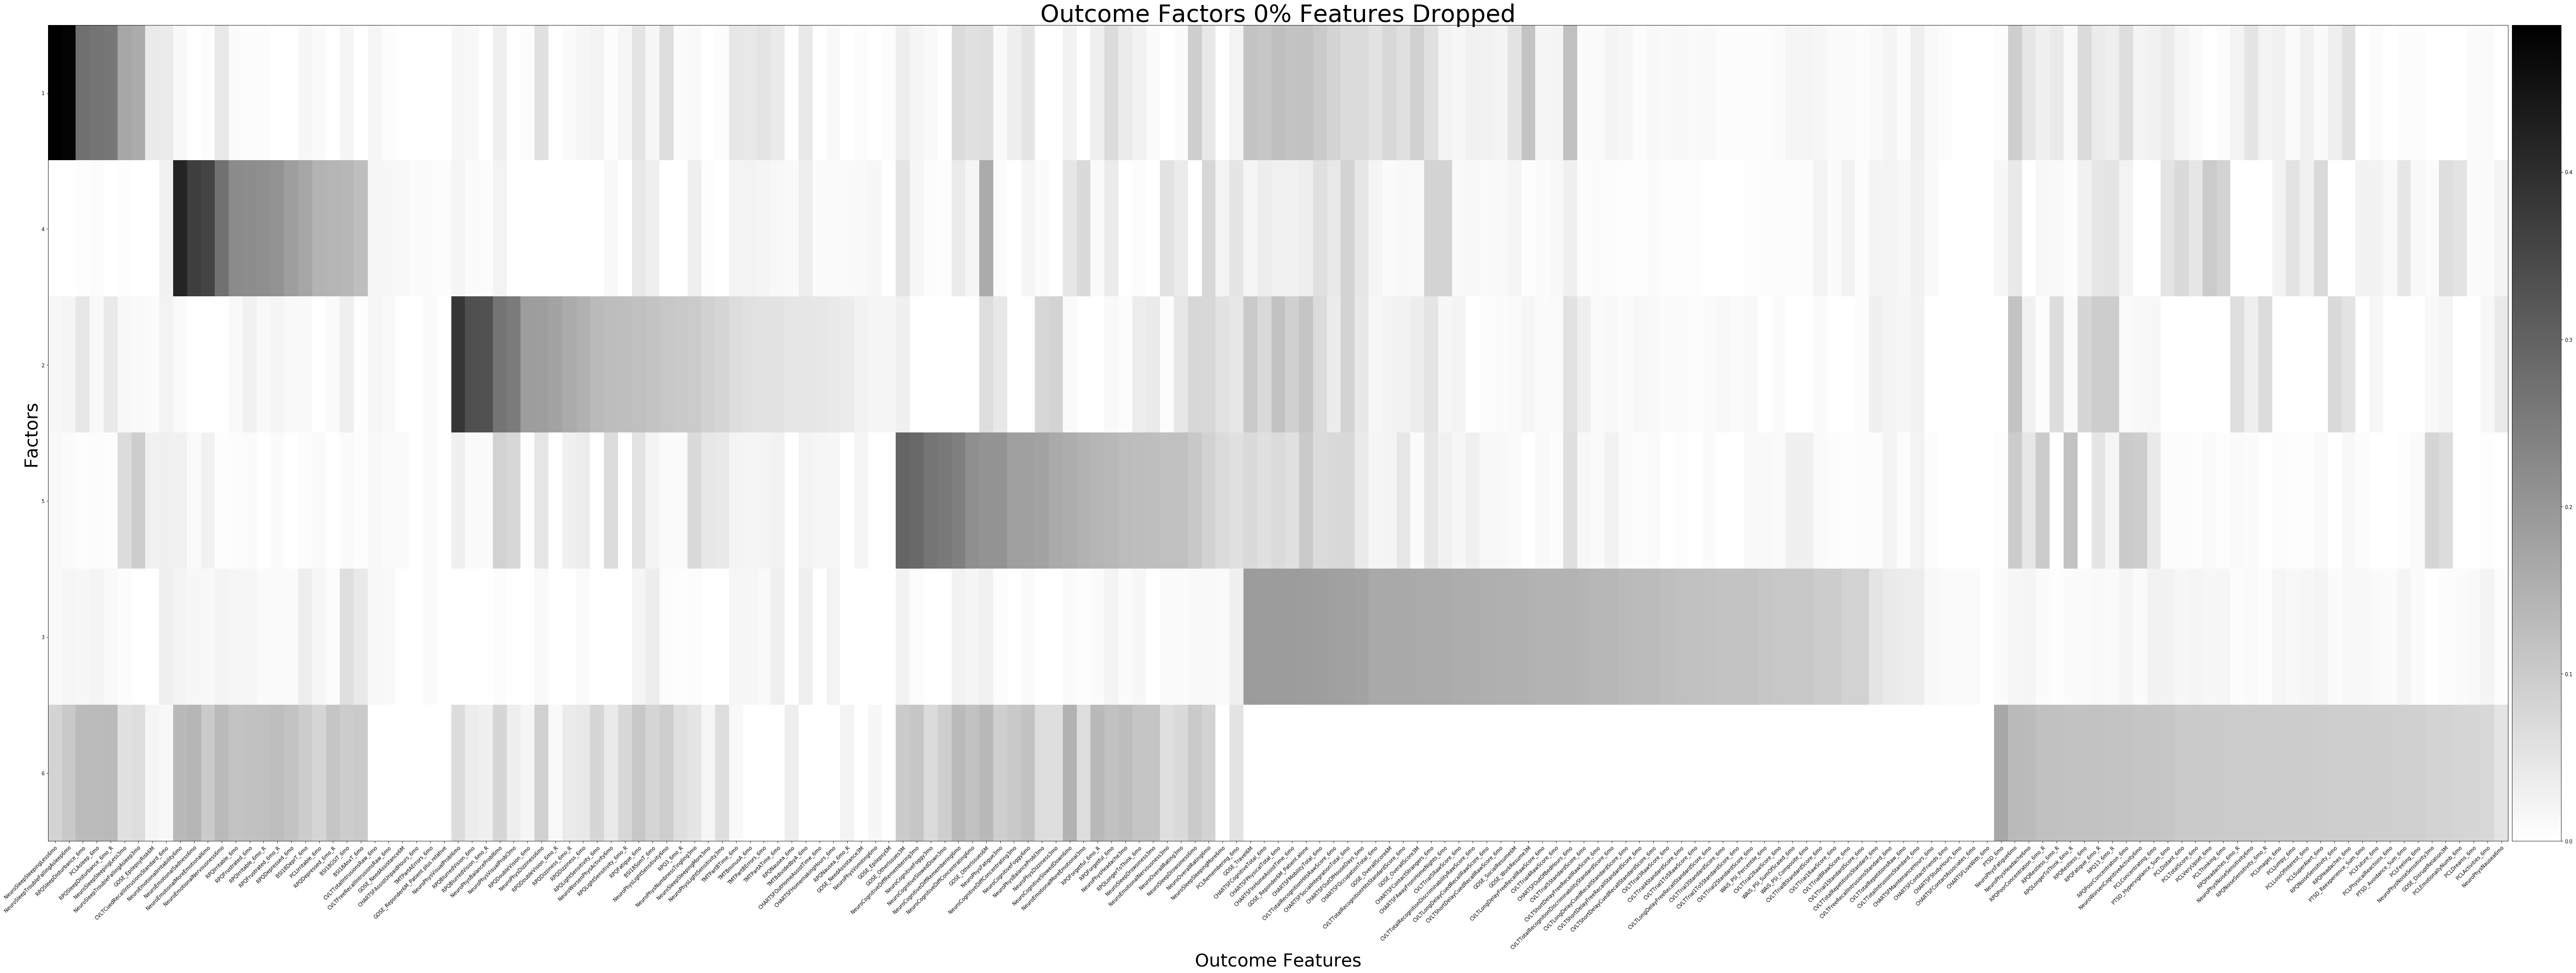

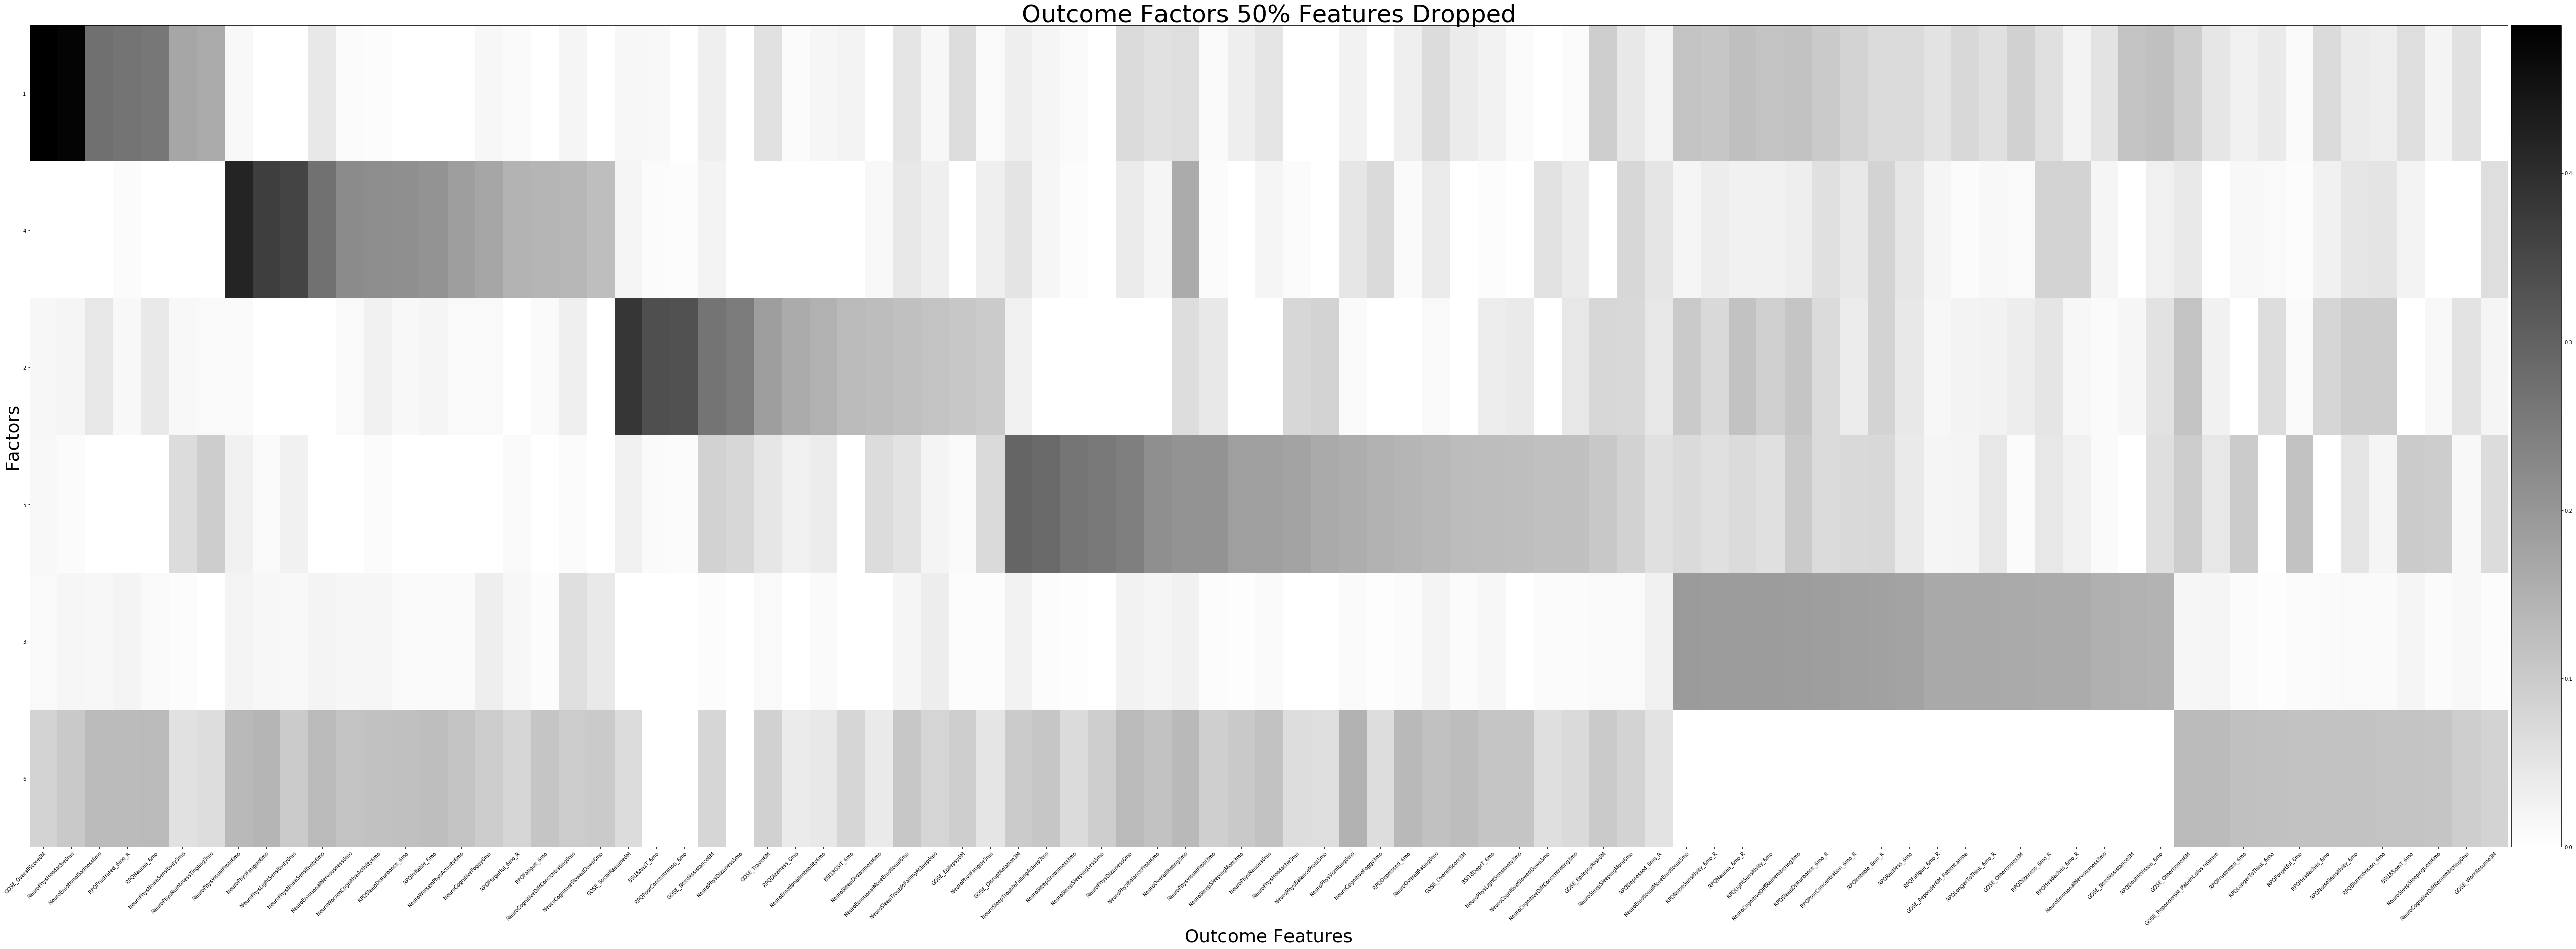

In [76]:
percent = [0,10,20,30,40,50,60,70,80,90]
percent2 = [0,50]
for ii,p in enumerate(percent2):
    A_features_dropped, h_new, dropped_features = drop_x_percent(A,w,h,feature_names,p)
    plt.figure(figsize=(90,30))
    nmf_bases_heatmap(h_new, col_labels=labels, sort=True, ax=None,
            cbar_kw={}, cbarlabel="", xlab='Outcome Features', ylab='Factors', aspect='auto',
            title='Outcome Factors {}% Features Dropped'.format(p))
    txt = str(sorted(dropped_features))
    plt.savefig('/Users/ahyeon/Desktop/activ/results/features_dropped/oc{}.pdf'.format(p))


In [12]:
percent = [0,10,20,30,40,50,60,70,80,90]
for p in percent[6:]:
    print(p)
    A_features_dropped,h_new, dropped_features = drop_x_percent(A,w,h,feature_names,p)
    fname = '/Users/ahyeon/Desktop/activ/activ/data_features_dropped_{}.h5'.format(p)
    TrackTBIFile.write(fname, rawbm, A_features_dropped)

60
70
80
90


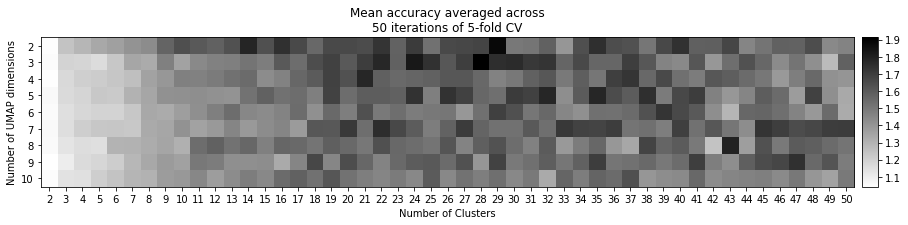

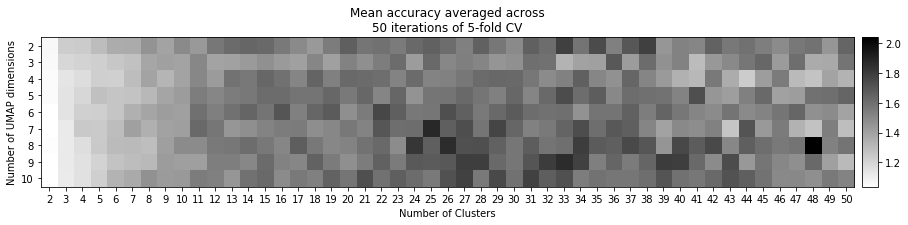

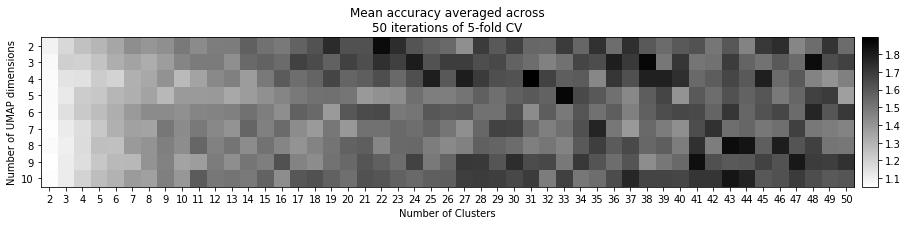

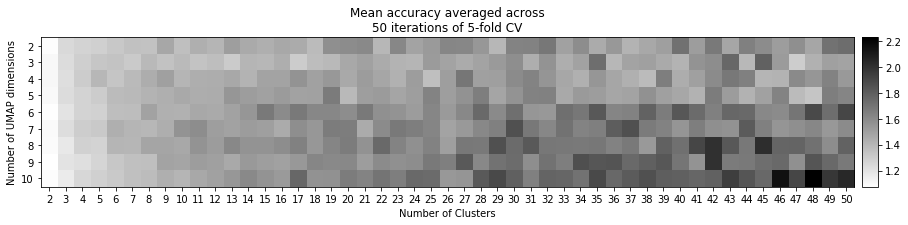

In [75]:

for p in percent2:
    path = '/Users/ahyeon/Desktop/files/umap_cluster_features_{}.h5'.format(p)
    results = UmapClusteringResults(path)
    plt.figure(figsize=(15, 5))
    ret = results.make_heatmap()
    plt.savefig('/Users/ahyeon/Desktop/activ/results/features_dropped/hm{}.pdf'.format(p))

    

In [2]:
import matplotlib.colors
print(matplotlib.colors[0])

TypeError: 'module' object is not subscriptable

In [11]:
def log(x, a,b,c):
    return a*np.log(b*x) + c

In [20]:
plt.xlabel()

TypeError: xlabel() missing 1 required positional argument: 's'

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


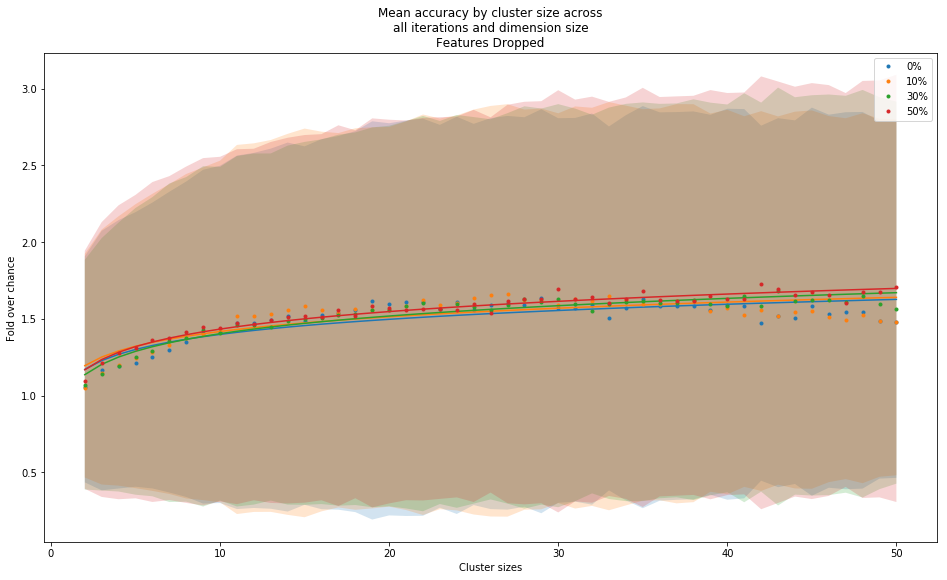

In [26]:
from scipy.optimize import curve_fit
from scipy.stats import norm

percent = [0, 10,20,30,40,50]
percent2 = [0,10,30,50]
for ii,p in enumerate(percent2):
    path = '/Users/ahyeon/Desktop/files/umap_cluster_features_{}.h5'.format(p)
    results = UmapClusteringResults(path)
    mean_results = results.adjust().T.mean(axis=1)
    plt.rcParams["figure.figsize"] = [16,9]
    cmap = plt.get_cmap("tab10")
    plt.title("Mean accuracy by cluster size across\nall iterations and dimension size\nFeatures Dropped")
    plt.xlabel("Cluster sizes", )
    plt.ylabel("Fold over chance")
    ci = norm.interval(0.25, loc=mean_results, scale=1)
    plt.plot(results.cluster_sizes,mean_results, '.',label='{}%'.format(p), color=cmap(ii))
    popt, pcov = curve_fit(log, results.cluster_sizes, mean_results)
    plt.plot(results.cluster_sizes, log(results.cluster_sizes, *popt), color=cmap(ii))
    plt.fill_between(results.cluster_sizes, log(results.cluster_sizes, *popt)-ci[0],log(results.cluster_sizes, *popt)+ci[0], alpha = 0.2)
    plt.legend()
#     plt.savefig('/Users/ahyeon/Desktop/activ/results/features_dropped/meanacc.pdf')


In [19]:
help(scipy.optimize.curve_fit)

NameError: name 'scipy' is not defined

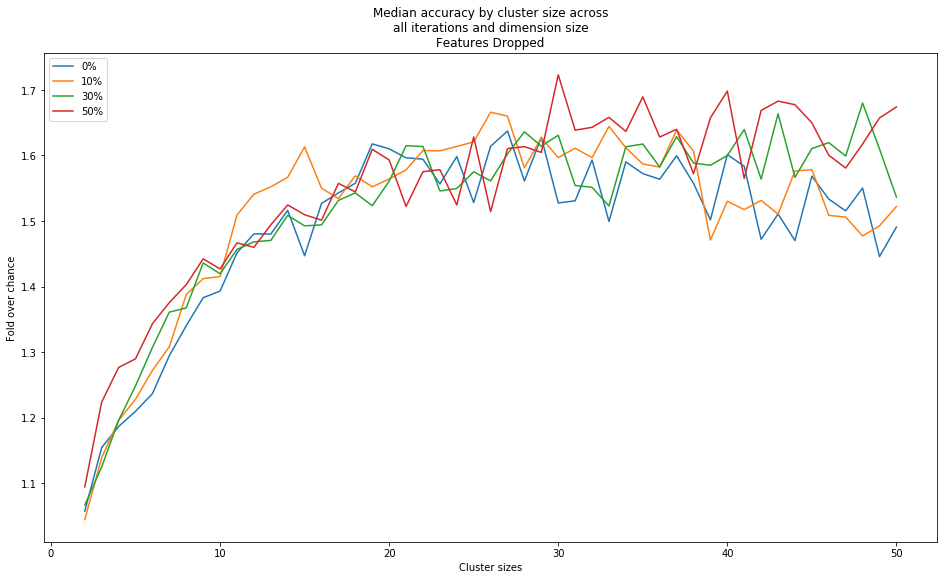

In [73]:

percent = [0, 10,20,30,40,50]
percent2 = [0,10,30,50]
for p in percent2:
    path = '/Users/ahyeon/Desktop/files/umap_cluster_features_{}.h5'.format(p)
    results = UmapClusteringResults(path)
    median_results = np.median(results.adjust().T, axis=1)
    plt.rcParams["figure.figsize"] = [16,9]
    plt.title("Median accuracy by cluster size across\nall iterations and dimension size\nFeatures Dropped")
    plt.xlabel("Cluster sizes")
    plt.ylabel("Fold over chance")
    plt.plot(results.cluster_sizes, median_results, label='{}%'.format(p))
    plt.legend()
    plt.savefig('/Users/ahyeon/Desktop/activ/results/features_dropped/medacc.pdf')


In [22]:
def fill_document(doc):
    """Add a section, a subsection and some text to the document.

    :param doc: the document
    :type doc: :class:`pylatex.document.Document` instance
    """
    with doc.create(Section('A section')):
        doc.append('Some regular text and some ')
        doc.append(italic('italic text. '))

        with doc.create(Subsection('A subsection')):
            doc.append('Also some crazy characters: $&#{}')

In [74]:
doc = Document()
# fill_document(doc)

# doc.generate_pdf(clean_tex=False)
# doc.generate_tex()

# # Document with `\maketitle` command activated
# doc = Document()

doc.preamble.append(Command('title', 'Dropped Features Report'))
doc.preamble.append(Command('date', NoEscape(r'\today')))
doc.append(NoEscape(r'\maketitle'))


oc0 = '/Users/ahyeon/Desktop/activ/results/features_dropped/oc0.pdf'
oc50 = '/Users/ahyeon/Desktop/activ/results/features_dropped/oc50.pdf'

hm0 = '/Users/ahyeon/Desktop/activ/results/features_dropped/hm0.pdf'
hm50 = '/Users/ahyeon/Desktop/activ/results/features_dropped/hm50.pdf'

meanacc = '/Users/ahyeon/Desktop/activ/results/features_dropped/meanacc.pdf'
medacc = '/Users/ahyeon/Desktop/activ/results/features_dropped/medacc.pdf'


with doc.create(Section('Intro')):
    doc.append("""This report is a comparative analysis of the prediction accuracies of the umap clustering pipeline across various amounts of outcome features used. The lowest contributing features were dropped from the raw outcomes (total 177) in increments of 10% up to 50%. There was no significant difference in the prediction accuracies when all features versus only 50% were used, suggesting that further analyses can be performed with only 50% of the outcome features. """)
with doc.create(Section('Outcome Factors')):
    doc.append("Outcome Factors heatmap with features dropped.")
    with doc.create(SubFigure(position='ht')) as fig1:
        fig1.add_image(oc0,width='500px')
    with doc.create(SubFigure(position='ht')) as fig2:
        fig2.add_image(oc50, width='500px')
        fig2.add_caption("""10% dropped features: 'CHARTSFAssistUnpaidHours_6mo', 'CHARTSFContactAssociates_6mo', 'CHARTSFContactFriends_6mo', 'CHARTSFLiveWith_6mo', 'CHARTSFMaintenanceHours_6mo', 'CHARTSFOutHomeAssistTime_6mo', 'CHARTSFStudyHours_6mo', 'CVLTFreeRecallIntrusionsRaw_6mo', 'CVLTTotalIntrusionsRaw_6mo', 'CVLTTotalRepetitionsRaw_6mo', 'GOSE_Epilepsy6M', 'GOSE_NeedAssistance3M', 'GOSE_NeedAssistance6M', 'GOSE_Reponder6M_Patient.plus.relative', 'NeuroPhysVomiting6mo', 'RPQNausea_6mo_R', 'TMTPartAErrors_6mo'""")
with doc.create(Section('Heatmap of 0%,10%,30%,50% Features Dropped')):
    with doc.create(Figure()) as fig4:
        fig4.add_image(hm0)
        fig4.add_image(hm50)
with doc.create(Section('Number of Clusters vs Mean and Median Accuracy')):
    with doc.create(Figure()) as fig3:
        fig3.add_image(meanacc)
        fig3.add_image(medacc)
   
doc.generate_pdf('dropped_features_report', clean_tex=False)

Latexmk: This is Latexmk, John Collins, 22 April 2016, version: 4.45.
Rule 'pdflatex': File changes, etc:
   Changed files, or newly in use since previous run(s):
      '/Users/ahyeon/Desktop/activ/results/features_dropped/meanacc.pdf'
      '/Users/ahyeon/Desktop/activ/results/features_dropped/medacc.pdf'
      'dropped_features_report.aux'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex  --interaction=nonstopmode -recorder  "dropped_features_report.tex"'
------------
Latexmk: applying rule 'pdflatex'...
This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./dropped_features_report.tex
LaTeX2e <2016/03/31>
Babel <3.9r> and hyphenation patterns for 83 language(s) loaded.
(/usr/local/texlive/2016/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2016/texmf-dist/tex/latex/base/si

CalledProcessError: Command '['latexmk', '--pdf', '--interaction=nonstopmode', 'dropped_features_report.tex']' returned non-zero exit status 12.

In [45]:
doc = Document()
oc0 = '/Users/ahyeon/Desktop/activ/results/features_dropped/oc0.pdf'
with doc.create(Section('Outcome Factors')):
    doc.append("Outcome Factors heatmap with features dropped.")
    with doc.create(Figure()) as fig1:
        fig1.add_image(oc0)
doc.generate_pdf('dropped_features_report', clean_tex=False)

In [67]:
help(Figure)

Help on class Figure in module pylatex.figure:

class Figure(pylatex.base_classes.float.Float)
 |  A class that represents a Figure environment.
 |  
 |  Method resolution order:
 |      Figure
 |      pylatex.base_classes.float.Float
 |      pylatex.base_classes.containers.Environment
 |      pylatex.base_classes.containers.Container
 |      pylatex.base_classes.latex_object.LatexObject
 |      collections.UserList
 |      collections.abc.MutableSequence
 |      collections.abc.Sequence
 |      collections.abc.Reversible
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  add_image(self, filename, *, width=NoEscape(0.8\textwidth), placement=NoEscape(\centering))
 |      Add an image to the figure.
 |      
 |      Args
 |      ----
 |      filename: str
 |          Filename of the image.
 |      width: str
 |          The width of the image
 |